<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Heatmap-of-checkpoint-genes,-their-ligands-and-cytolytic-activity-in-samples-with->--1000-immune-score" data-toc-modified-id="Heatmap-of-checkpoint-genes,-their-ligands-and-cytolytic-activity-in-samples-with->--1000-immune-score-1">Heatmap of checkpoint genes, their ligands and cytolytic activity in samples with &gt; -1000 immune score</a></span></li><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-2">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-3">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-4">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-5">Main</a></span><ul class="toc-item"><li><span><a href="#High-TIM3-group-in-TARGET" data-toc-modified-id="High-TIM3-group-in-TARGET-5.1">High TIM3 group in TARGET</a></span><ul class="toc-item"><li><span><a href="#stats-for-target" data-toc-modified-id="stats-for-target-5.1.1">stats for target</a></span></li><li><span><a href="#KM" data-toc-modified-id="KM-5.1.2">KM</a></span></li></ul></li><li><span><a href="#High-TIM3-group-in-KF_NBL" data-toc-modified-id="High-TIM3-group-in-KF_NBL-5.2">High TIM3 group in KF_NBL</a></span><ul class="toc-item"><li><span><a href="#stats-for-KF_NBL" data-toc-modified-id="stats-for-KF_NBL-5.2.1">stats for KF_NBL</a></span></li></ul></li></ul></li><li><span><a href="#Deprecated" data-toc-modified-id="Deprecated-6">Deprecated</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#subset-gene-matrix-to-checkpoints" data-toc-modified-id="subset-gene-matrix-to-checkpoints-6.0.0.1">subset gene matrix to checkpoints</a></span></li></ul></li></ul></li><li><span><a href="#Get-summary-values-for-genee-xpression-for-main-text" data-toc-modified-id="Get-summary-values-for-genee-xpression-for-main-text-6.1">Get summary values for genee xpression for main text</a></span></li></ul></li><li><span><a href="#Log2-transform-exp_matrix" data-toc-modified-id="Log2-transform-exp_matrix-7">Log2 transform exp_matrix</a></span><ul class="toc-item"><li><span><a href="#There-are-12-NBL-cases-with-high-levels-of-tim3-and-low-levels-of-lag3.-Find-them-from-the-heatmap-and-compare-them-to-cases-with-similar-range-of--immunescore" data-toc-modified-id="There-are-12-NBL-cases-with-high-levels-of-tim3-and-low-levels-of-lag3.-Find-them-from-the-heatmap-and-compare-them-to-cases-with-similar-range-of--immunescore-7.1">There are 12 NBL cases with high levels of tim3 and low levels of lag3. Find them from the heatmap and compare them to cases with similar range of  immunescore</a></span><ul class="toc-item"><li><span><a href="#All-these-high-tim3-cases-are-MYC-non-amp" data-toc-modified-id="All-these-high-tim3-cases-are-MYC-non-amp-7.1.1">All these high tim3 cases are MYC non-amp</a></span></li></ul></li><li><span><a href="#Heatmap-of-checkpoint-genes-and-celltypes-for-high-vs-low-NBL-TIMs" data-toc-modified-id="Heatmap-of-checkpoint-genes-and-celltypes-for-high-vs-low-NBL-TIMs-7.2">Heatmap of checkpoint genes and celltypes for high vs low NBL TIMs</a></span><ul class="toc-item"><li><span><a href="#Stats-test-for-TIM-samples" data-toc-modified-id="Stats-test-for-TIM-samples-7.2.1">Stats test for TIM samples</a></span></li></ul></li></ul></li><li><span><a href="#2--pediatric-CNS-tumors" data-toc-modified-id="2--pediatric-CNS-tumors-8">2- pediatric CNS tumors</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#High-PD1" data-toc-modified-id="High-PD1-8.0.1">High PD1</a></span></li></ul></li></ul></li></ul></div>

# Heatmap of checkpoint genes, their ligands and cytolytic activity in samples with > -1000 immune score

# Dependencies

In [1]:
options(scipen = 999)

In [2]:
library(ggplot2)
library(dplyr)
library(circlize)
library(ggbeeswarm)
library(gridExtra)
library(reshape2)
library(ComplexHeatmap)

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”Warning message:
“package ‘dplyr’ was built under R version 3.5.2”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

circlize version 0.4.9
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Loading required package: grid
ComplexHeatmap version 1.99.5
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: http

# Functions

In [3]:
stat.fx <- function(mydf, group){
    mat_p <- matrix(nrow = 9, 
                    ncol = 1)
    rownames(mat_p) <- c("B.cells", 
                         "Macrophages.M1", "Macrophages.M2",
                         "Neutrophils", "NK.cells", "T.cells.CD4", "T.cells.CD8",
                          "Tregs", "Dendritic.cells")
    colnames(mat_p) <-  "TIM3"
    
    for(i in 1:nrow(mat_p)){
        var <- rownames(mat_p)[i]
        wiltest <- tryCatch(wilcox.test(mydf[[var]] ~ mydf[[group]]),            
                            error = function(e) NULL)   
        if(!is.null(wiltest)){
            mat_p[i,1] <- wiltest$p.value 
                            }
                            }
    return(mat_p)
}

In [4]:
padjust.fx <- function(mymat){
    mymat <- as.data.frame(mymat)
    mymat$padj <- p.adjust(mymat[,1], 
                           method = "bonferroni")
    return(mymat[order(mymat$padj),])
    
}

# Paths

In [5]:
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [6]:
load(file = paste0(datapath, "QuanTIseq/primary_estimate_manifest_quanti.RData"))

In [7]:
primary_estimate_manifest_quanti$percread <- 8.0947988*exp(primary_estimate_manifest_quanti$ImmuneScore*0.0006267)

In [8]:
primary_estimate_manifest_quanti_cutoff <- primary_estimate_manifest_quanti[primary_estimate_manifest_quanti$ImmuneScore > -1000,]

In [9]:
load(paste0(datapath,"exp_mat/tpm_matrix_ped_final.RData"))

In [10]:
table(primary_estimate_manifest_quanti_cutoff$group)


 CBTTC   DKFZ KF_NBL   PNOC TARGET   TCGA 
   461     75    163     32    122   2330 

## High TIM3 group in TARGET

In [11]:
TARGETids_highTIM3 <- c(
"TARGET-30-PANGXK-01A",
"TARGET-30-PAUDDK-01A",
"TARGET-30-PALCBW-01A",
"TARGET-30-PAPTCR-01A",
"TARGET-30-PANSBN-01A",
"TARGET-30-PATEKG-01A",
"TARGET-30-PASGAP-01A",
"TARGET-30-PANXJL-01A",
"TARGET-30-PANKFE-01A",
"TARGET-30-PAIXIF-01A",
"TARGET-30-PASMJG-01A",
"TARGET-30-PARSBI-01A",
"TARGET-30-PALVKK-01A")

In [12]:
highTIMs <- primary_estimate_manifest_quanti_cutoff[primary_estimate_manifest_quanti_cutoff$sample_id %in% TARGETids_highTIM3,]

In [13]:
summary(highTIMs$ImmuneScore)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  902.9  1035.7  1233.8  1307.7  1417.8  2129.1 

Find low tim3 group with similar immunescore

In [14]:
target <- primary_estimate_manifest_quanti_cutoff[primary_estimate_manifest_quanti_cutoff$group == "TARGET",]

lowTIMs_target <- target[!target$sample_id %in% TARGETids_highTIM3,]

lowTIMs_target_range <- lowTIMs_target[lowTIMs_target$ImmuneScore > 903 &
                                       lowTIMs_target$ImmuneScore < 2129,]

In [15]:
lowTIMs_target_range$sample_id

[1] "TARGET-30-PAIPGU-01A" "TARGET-30-PAIVHE-01A" "TARGET-30-PALIIN-01A"
 [4] "TARGET-30-PALTEG-01A" "TARGET-30-PANRRW-01A" "TARGET-30-PAPEFE-01A"
 [7] "TARGET-30-PAPUAR-01A" "TARGET-30-PAPUEB-01A" "TARGET-30-PAPUWY-01A"
[10] "TARGET-30-PAPVXS-01A" "TARGET-30-PARACM-01A" "TARGET-30-PARDIW-01A"
[13] "TARGET-30-PARKGJ-01A" "TARGET-30-PARNNC-01A" "TARGET-30-PARZCJ-01A"
[16] "TARGET-30-PASFGG-01A" "TARGET-30-PASRFS-01A" "TARGET-30-PASWIJ-01A"
[19] "TARGET-30-PASWVY-01A" "TARGET-30-PASXRJ-01A" "TARGET-30-PASYPX-01A"
[22] "TARGET-30-PASZPI-01A" "TARGET-30-PATDXC-01A"

In [16]:
lowTIMs_target_range$TIMgroup <- "Low"
highTIMs$TIMgroup <- "High"

bind low and high tim3 groups

In [17]:
TIMs_NBL_target <- rbind(lowTIMs_target_range, highTIMs)

Get myc status add to TIMs_NBL_target and remove amplified samples from analysis

In [18]:
NBL_manifest <- read.table(paste0(manifestpath, "TARGET_NBL_Discovery_ClinicalData_20170525.txt"),
                          sep = "\t", na.strings = "", header = T, stringsAsFactors = F)

In [19]:
colnames(NBL_manifest)[colnames(NBL_manifest) == "TARGET.USI"] <- "case_id"

In [20]:
NBL_manifest_subset <- NBL_manifest[NBL_manifest$case_id %in% TIMs_NBL_target$case_id,]

In [21]:
TIMs_NBL_target <- merge(TIMs_NBL_target, NBL_manifest_subset[, c("case_id", "MYCN.status", "COG.Risk.Group")], by = "case_id")

In [22]:
table(TIMs_NBL_target$MYCN.status)


    Amplified Not Amplified       Unknown 
            2            33             1 

In [23]:
TIMs_NBL_target <- TIMs_NBL_target[ TIMs_NBL_target$MYCN.status == "Not Amplified",]

In [24]:
celltypes <- c("T.cells.CD8", "T.cells.CD4", "Tregs",
               "B.cells", "NK.cells", "Macrophages.M1",
               "Macrophages.M2", "Neutrophils", "Dendritic.cells")

In [25]:
TIMs_NBL_target_cells <- TIMs_NBL_target[,c(celltypes, "TIMgroup")]

In [26]:
table(TIMs_NBL_target_cells$TIMgroup)


High  Low 
  12   21 

In [27]:
TIMs_NBL_target_cells_m <- melt(TIMs_NBL_target_cells)

Using TIMgroup as id variables


In [28]:
head(TIMs_NBL_target_cells_m)

TIMgroup,variable,value
<chr>,<fct>,<dbl>
Low,T.cells.CD8,0.016892028
Low,T.cells.CD8,0.044150481
High,T.cells.CD8,0.004703248
High,T.cells.CD8,0.002642497
Low,T.cells.CD8,0.016706838
Low,T.cells.CD8,0.041796700


In [29]:
colpal <- c("Low" = "#74add1", 
            "High" = "#d73027") 

In [30]:
dodge <- position_dodge(width = 0.8)

violinplot <- ggplot(TIMs_NBL_target_cells_m, 
                      aes(y= value, 
                          x= variable, 
                          fill = TIMgroup)) + 
geom_violin(position = dodge, scale = "width")+
geom_boxplot(width= 0.3, 
             outlier.colour=NA, 
             position = dodge) +
theme(axis.title.x = element_blank(),
      axis.title.y = element_text(size = 25),
      axis.ticks.x = element_blank(),
      axis.line = element_line(color = "black"),
      axis.text.y = element_text(size = 25),
      axis.text.x = element_text(angle = 45, hjust = 1, size = 25),
      legend.position = "bottom",
     legend.text = element_text(size = 20)) +
theme(panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "transparent",colour = NA),
      panel.border=element_blank(),
      legend.key = element_rect(fill = "white", colour = "white"),
      plot.margin = unit(c(0.2,0,0,0),"cm")) +
scale_fill_manual(values = colpal) + 
labs(y = "Cell fractions", x = "Celltypes")

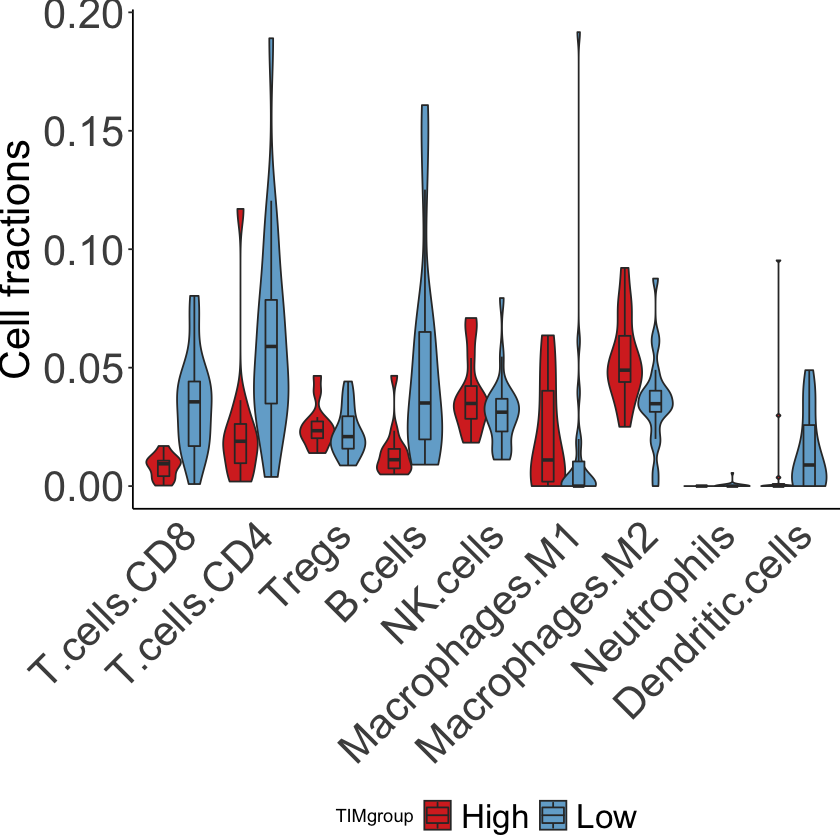

In [31]:
violinplot

In [32]:
pdf(file = paste0(plotpath,"TIM3_cells_NBL_MYCNA_TARGET.pdf"),
    width = 10, height = 10,useDingbats = FALSE)
print(violinplot)
dev.off()

pdf 
  2

### stats for target

In [33]:
myTIM3_p <- stat.fx(TIMs_NBL_target_cells, "TIMgroup")

Warning message in wilcox.test.default(x = c(0.0237669150450322, 0, 0.0147488861867437, :
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(x = c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), :
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(x = c(0, 0, 0.0297915215953934, 0, 0, 0, :
“cannot compute exact p-value with ties”

In [34]:
padjust.fx(myTIM3_p)

,TIM3,padj
,<dbl>,<dbl>
T.cells.CD8,0.00001462161,0.0001315945
B.cells,0.00011015809,0.0009914229
T.cells.CD4,0.00176610882,0.0158949794
Macrophages.M2,0.00784564294,0.0706107864
Dendritic.cells,0.07981502551,0.7183352296
Macrophages.M1,0.10200570512,0.9180513461
Neutrophils,0.29816054873,1.0000000000
NK.cells,0.21338570507,1.0000000000
Tregs,0.29085554786,1.0000000000


### KM

In [35]:
library(survival)
library(survminer)

Warning message:
“package ‘survival’ was built under R version 3.5.2”Warning message:
“package ‘survminer’ was built under R version 3.5.2”Loading required package: ggpubr


In [38]:
TIMs_NBL_target$days_to_death

[1] 1976  768 3122  402 2772 1743  330 1837   NA 2098  995 2466 2889  500 1952
[16] 2178 2083 2193  224 1893  934 3722  304 1940  296 2325 1918 4399  436 1319
[31]  421 1102   NA

In [40]:
TIMs_NBL_target_OS <- TIMs_NBL_target[TIMs_NBL_target$vital_status == "Alive" |
                                         TIMs_NBL_target$vital_status == "Deceased",]

TIMs_NBL_target_OS <- TIMs_NBL_target_OS[!is.na(TIMs_NBL_target_OS$days_to_death),]

In [41]:
TIMs_NBL_target_OS$vital_status[TIMs_NBL_target_OS$vital_status == "Deceased"] <- 1
TIMs_NBL_target_OS$vital_status[TIMs_NBL_target_OS$vital_status == "Alive"] <- 0
TIMs_NBL_target_OS$vital_status <- as.numeric(as.character(TIMs_NBL_target_OS$vital_status))

In [ ]:
mydf$immune <- NA
mydf$immune[mydf[[var]] >  topcutoff  ] <- 1
mydf$immune[mydf[[var]] <=  bottomcutoff ] <- 0

In [43]:
    sfit <- survfit(Surv(days_to_death, vital_status)~ TIMgroup, data=TIMs_NBL_target_OS)
    
    kmplot <- ggsurvplot(sfit, data = TIMs_NBL_target_OS,
                         pval = TRUE, pval.size = 8,
                         legend.title="", font.legend = 16, font.main = 23,
                         font.x = 25,font.y = 25,font.tickslab = 20) 

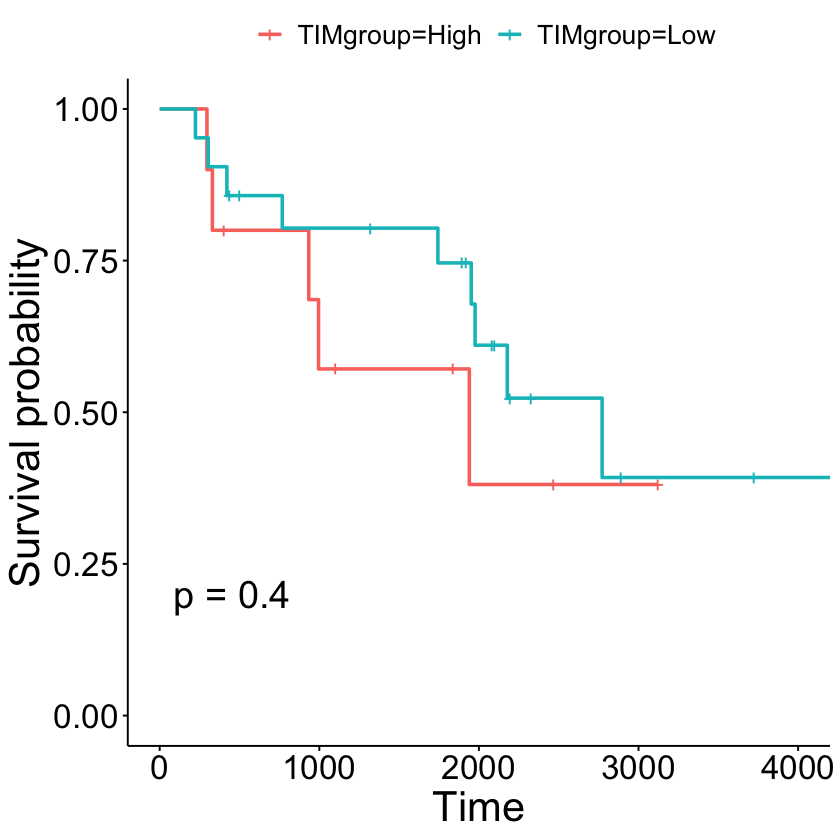

In [44]:
kmplot

## High TIM3 group in KF_NBL

46 samples are MYCN amplified according to cna analysis on pedcbio

In [35]:
mycn_kf <- c(
"GMKF-30-PASCDX03-01B-99R",
"GMKF-30-PASCWD03-01B-99R",
"GMKF-30-PASFKX03-01B-99R",
"GMKF-30-PASFNY03-01B-99R",
"GMKF-30-PASHEL03-01B-99R",
"GMKF-30-PASIIU03-01B-99R",
"GMKF-30-PASIUJ03-01B-99R",
"GMKF-30-PASJRT03-01B-99R",
"GMKF-30-PASKIS03-01B-99R",
"GMKF-30-PASMET03-01B-99R",
"GMKF-30-PASNUI03-01B-99R",
"GMKF-30-PASPGB03-01B-99R",
"GMKF-30-PASREV03-01B-99R",
"GMKF-30-PASUMG03-01B-99R",
"GMKF-30-PASUTC03-01B-99R",
"GMKF-30-PASWXG03-01B-99R",
"GMKF-30-PASWYR03-01B-99R",
"GMKF-30-PASXIE03-01B-99R",
"GMKF-30-PASXRG03-01B-99R",
"GMKF-30-PASXSJ03-01B-99R",
"GMKF-30-PASYIP03-01B-99R",
"GMKF-30-PASZYY03-01B-99R",
"GMKF-30-PATIYD03-01B-99R",
"GMKF-30-PATKPD03-01B-99R",
"GMKF-30-PATMZJ03-01B-99R",
"GMKF-30-PATNZJ03-01B-99R",
"GMKF-30-PATRVB03-01B-99R",
"GMKF-30-PATSVA03-01B-99R",
"GMKF-30-PATTPC03-01B-99R",
"GMKF-30-PATWED03-01B-99R",
"GMKF-30-PATWGR03-01B-99R",
"GMKF-30-PATXKG03-01B-99R",
"GMKF-30-PATYAU03-01B-99R",
"GMKF-30-PATZRF03-01B-99R",
"GMKF-30-PAUGJI03-01B-99R",
"GMKF-30-PAUHSJ03-01B-99R",
"GMKF-30-PAUIHH03-01B-99R",
"GMKF-30-PAUJRW03-01B-99R",
"GMKF-30-PAUKLK03-01B-99R",
"GMKF-30-PAUMJN03-01B-99R",
"GMKF-30-PAUNTY03-01B-99R",
"GMKF-30-PAUTFT03-01B-99R",
"GMKF-30-PAUTLP03-01B-99R",
"GMKF-30-PAUUHH03-01B-99R",
"GMKF-30-PAUUHY03-01B-99R",
"GMKF-30-PAVFZW03-01B-99R")

In [36]:
KFids_highTIM3 <- c(
"GMKF-30-PASKZT03-01B-99R",
"GMKF-30-PAUIRD03-01B-99R",
"GMKF-30-PAUTFT03-01B-99R",
"GMKF-30-PATLBP03-01B-99R",
"GMKF-30-PAUYFR03-01B-99R",
"GMKF-30-PASKFM03-01B-99R",
"GMKF-30-PATLDR03-01B-99R",
"GMKF-30-PATJDG03-01B-99R",
"GMKF-30-PAUPMU03-01B-99R",
"GMKF-30-PATBCM03-01B-99R",
"GMKF-30-PATSUL03-01B-99R",
"GMKF-30-PAUKYI03-01B-99R",
"GMKF-30-PASCGM03-01B-99R",
"GMKF-30-PASUMK03-01B-99R",
"GMKF-30-PARWEV03-01B-99R",
"GMKF-30-PARZCJ03-01B-99R",
"GMKF-30-PASXWF03-01B-99R",
"GMKF-30-PASYYZ03-01B-99R",
"GMKF-30-PARYAG03-01B-99R")

In [37]:
KF_highTIMs <- primary_estimate_manifest_quanti_cutoff[primary_estimate_manifest_quanti_cutoff$sample_id %in% KFids_highTIM3,]

In [38]:
summary(KF_highTIMs$ImmuneScore)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  154.4   551.2   952.3   918.0  1256.7  1592.7 

Find low tim3 group with similar immunescore

In [39]:
kf_nbl <- primary_estimate_manifest_quanti_cutoff[primary_estimate_manifest_quanti_cutoff$group == "KF_NBL",]

lowTIMs_kf_nbl <- kf_nbl[!kf_nbl$sample_id %in% KFids_highTIM3,]

lowTIMs_kf_nbl_range <- lowTIMs_kf_nbl[lowTIMs_kf_nbl$ImmuneScore > 154 &
                                       lowTIMs_kf_nbl$ImmuneScore < 1592,]

In [40]:
lowTIMs_kf_nbl_range$sample_id

[1] "GMKF-30-PARTRP03-01B-99R" "GMKF-30-PARVPD03-01B-99R"
 [3] "GMKF-30-PASAHC03-01B-99R" "GMKF-30-PASFEU03-01B-99R"
 [5] "GMKF-30-PASGBE03-01B-99R" "GMKF-30-PASKRS03-01B-99R"
 [7] "GMKF-30-PASLPG03-01B-99R" "GMKF-30-PASMET03-01B-99R"
 [9] "GMKF-30-PASNUI03-01B-99R" "GMKF-30-PASRRY03-01B-99R"
[11] "GMKF-30-PASRTR03-01B-99R" "GMKF-30-PASUCU03-01B-99R"
[13] "GMKF-30-PASUFD03-01B-99R" "GMKF-30-PASUVU03-01B-99R"
[15] "GMKF-30-PASWMY03-01B-99R" "GMKF-30-PASXRJ03-01B-99R"
[17] "GMKF-30-PATAAV03-01B-99R" "GMKF-30-PATDCJ03-01B-99R"
[19] "GMKF-30-PATEEE03-01B-99R" "GMKF-30-PATFTR03-01B-99R"
[21] "GMKF-30-PATIRK03-01B-99R" "GMKF-30-PATLFF03-01B-99R"
[23] "GMKF-30-PATMDE03-01B-99R" "GMKF-30-PATNVA03-01B-99R"
[25] "GMKF-30-PATNXK03-01B-99R" "GMKF-30-PATSRY03-01B-99R"
[27] "GMKF-30-PATSTU03-01B-99R" "GMKF-30-PATUAI03-01B-99R"
[29] "GMKF-30-PATUBI03-01B-99R" "GMKF-30-PATUPN03-01B-99R"
[31] "GMKF-30-PATVHJ03-01B-99R" "GMKF-30-PATWDV03-01B-99R"
[33] "GMKF-30-PATWPL03-01B-99R" "GMKF-30-PATYWG03-01B-99R"
[35] "GMKF-30-PAUCRL03-01B-99R" "GMKF-30-PAUEXM03-01B-99R"
[37] "GMKF-30-PAUGVZ03-01B-99R" "GMKF-30-PAUHXD03-01B-99R"
[39] "GMKF-30-PAUMJN03-01B-99R" "GMKF-30-PAUSJB03-01B-99R"
[41] "GMKF-30-PAUUWG03-01B-99R" "GMKF-30-PAUVPT03-01B-99R"
[43] "GMKF-30-PAVALS03-01B-99R" "GMKF-30-PAVHEU03-01B-99R"
[45] "GMKF-30-PAVJEV03-01B-99R" "GMKF-30-PAVKRF03-01A-01R"
[47] "GMKF-30-PAVKZC03-01A-01R"

In [41]:
lowTIMs_kf_nbl_range$TIMgroup <- "Low"
KF_highTIMs$TIMgroup <- "High"

In [42]:
TIMs_KF_NBL <- rbind(lowTIMs_kf_nbl_range, KF_highTIMs)

In [43]:
celltypes <- c("T.cells.CD8", "T.cells.CD4", "Tregs",
               "B.cells", "NK.cells", "Macrophages.M1",
               "Macrophages.M2", "Neutrophils", "Dendritic.cells")

In [44]:
TIMs_KF_NBL_cells <- TIMs_KF_NBL[,c(celltypes, "TIMgroup")]

In [45]:
table(TIMs_KF_NBL_cells$TIMgroup)


High  Low 
  19   47 

In [46]:
TIMs_KF_NBL_cells_m <- melt(TIMs_KF_NBL_cells)

Using TIMgroup as id variables


In [47]:
head(TIMs_KF_NBL_cells_m)

TIMgroup,variable,value
<chr>,<fct>,<dbl>
Low,T.cells.CD8,0.000000000
Low,T.cells.CD8,0.009236027
Low,T.cells.CD8,0.013152133
Low,T.cells.CD8,0.000000000
Low,T.cells.CD8,0.001005996
Low,T.cells.CD8,0.011870902


In [48]:
colpal <- c("Low" = "#74add1", 
            "High" = "#d73027") 

In [49]:
dodge <- position_dodge(width = 0.8)

kf_violinplot <- ggplot(TIMs_KF_NBL_cells_m, 
                      aes(y= value, 
                          x= variable, 
                          fill = TIMgroup)) + 
geom_violin(position = dodge, scale = "width")+
geom_boxplot(width= 0.3, 
             outlier.colour=NA, 
             position = dodge) +
theme(axis.title.x = element_blank(),
      axis.title.y = element_text(size = 25),
      axis.ticks.x = element_blank(),
      axis.line = element_line(color = "black"),
      axis.text.y = element_text(size = 25),
      axis.text.x = element_text(angle = 45, hjust = 1, size = 25),
      legend.position = "bottom",
     legend.text = element_text(size = 20)) +
theme(panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "transparent",colour = NA),
      panel.border=element_blank(),
      legend.key = element_rect(fill = "white", colour = "white"),
      plot.margin = unit(c(0.2,0,0,0),"cm")) +
scale_fill_manual(values = colpal) + 
labs(y = "Cell fractions", x = "Celltypes")

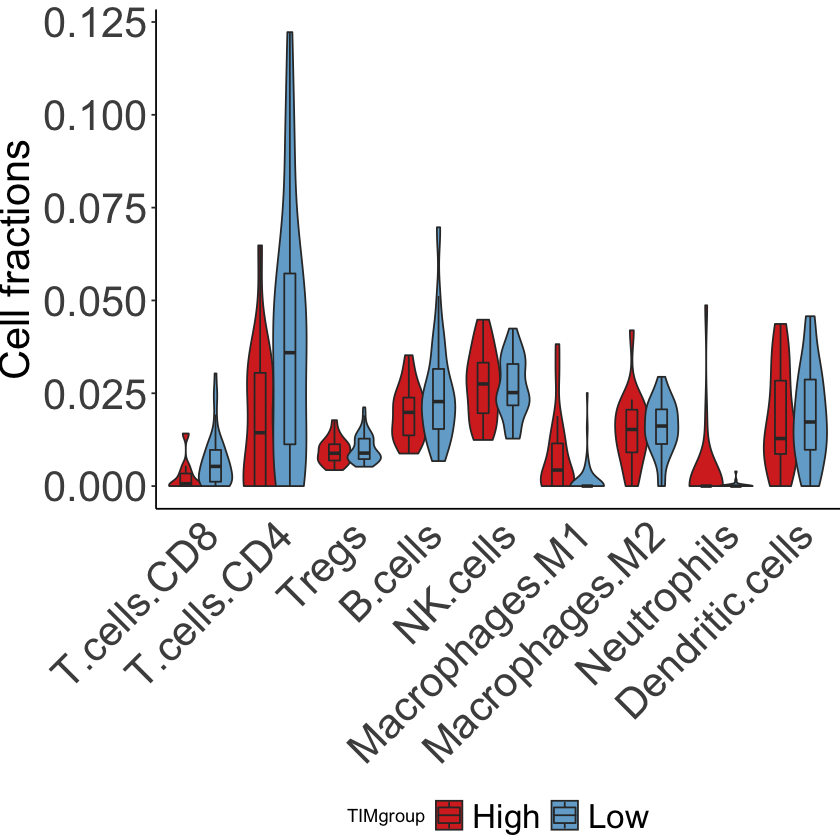

In [50]:
kf_violinplot

In [51]:
pdf(file = paste0(plotpath,"TIM3_cells_KF_NBL.pdf"),
    width = 10, height = 10,useDingbats = FALSE)
print(kf_violinplot)
dev.off()

pdf 
  2

### stats for KF_NBL

In [52]:
kf_myTIM3_p <- stat.fx(TIMs_KF_NBL_cells, "TIMgroup")

padjust.fx(kf_myTIM3_p)

Warning message in wilcox.test.default(x = c(0.0159756325829885, 0, 0.0113036896374974, :
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(x = c(0.0164888041319546, 0.0111802646663854, :
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(x = c(0, 0, 0, 0.0182293598113055, 0, 0, :
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(x = c(0.0304140852814108, 0.0143696445052157, :
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(x = c(0.00234287708635021, 0, 0, 0, 0.00542369838209911, :
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(x = c(0.0436691608050039, 0, 0.0287009640917196, :
“cannot compute exact p-value with ties”

,TIM3,padj
,<dbl>,<dbl>
Macrophages.M1,0.0006041002,0.005436902
T.cells.CD8,0.0069396220,0.062456598
T.cells.CD4,0.0099243442,0.089319098
B.cells,0.1037565302,0.933808772
Macrophages.M2,0.4921247669,1.000000000
Neutrophils,0.4842554349,1.000000000
NK.cells,0.8113706896,1.000000000
Tregs,0.4477022035,1.000000000
Dendritic.cells,0.6199203165,1.000000000


# Deprecated

#### subset gene matrix to checkpoints 

In [10]:
mygensig <- c("CD274",
              "CTLA4", "PDCD1", 
              "HAVCR2",
              "TIGIT", "LAG3",
              "PRF1", "GZMA")

In [11]:
subst_exp <- exp_matrix_primary_dedup[which(exp_matrix_primary_dedup$hgnc_symbol %in% mygensig),]
rownames(subst_exp) <- subst_exp[,1]
subst_exp <- subst_exp[,-1]

In [12]:
subst_exp

,7316-100,7316-101,7316-1038,7316-1052,7316-1059,7316-1060,7316-1064,7316-10,7316-1072,7316-1073,⋯,ICGC_PA89,ICGC_PA9,ICGC_PA91,ICGC_PA92,ICGC_PA93,ICGC_PA94,ICGC_PA95,ICGC_PA96,ICGC_PA97,ICGC_PA99
CD274,2.35,0.24,0.23,0.51,0.21,0.28,0.31,0.25,0.02,0.24,⋯,0.70699847,0.58839457,0.78018899,1.26935875,0.52667794,0.65933060,0.58798840,0.85681033,0.46276900,0.514263498
CTLA4,0.24,0.11,0.07,0.03,0.16,0.24,0.02,0.17,0.00,0.12,⋯,0.01766798,0.11427626,0.04836920,0.05276965,0.04781127,0.02974920,0.06201069,0.00000000,0.07201757,0.032797575
GZMA,0.73,0.07,0.15,0.14,0.22,0.25,0.09,0.26,0.03,0.60,⋯,0.07305905,0.47538736,0.16704413,0.15670413,0.71180716,0.09759473,0.61770924,0.04179466,0.28377697,0.325731002
HAVCR2,3.91,4.06,1.19,5.09,4.44,14.60,3.28,0.74,0.32,19.37,⋯,4.07442438,7.49853681,7.88031127,5.64781723,11.42618460,6.26797843,6.67078614,5.70751204,7.53755917,7.883139226
LAG3,0.26,0.03,0.86,0.40,0.65,0.62,1.31,0.51,0.04,0.47,⋯,0.04098006,0.02276043,0.02511792,0.07879415,0.04392521,0.03423223,0.03948474,0.03239157,0.06755849,0.008209609
PDCD1,0.53,0.07,0.10,0.02,0.52,0.10,0.86,0.10,0.00,0.21,⋯,0.01871343,0.02392929,0.02229761,0.05574502,0.05671607,0.00000000,0.07860892,0.02345034,0.01513360,0.000000000
PRF1,0.66,0.08,0.09,0.51,0.44,1.29,0.48,0.16,0.05,0.86,⋯,0.08934806,0.44778752,0.12355383,0.23190942,0.23690008,0.03828532,0.19748010,0.29780220,0.10536009,0.134038078
TIGIT,0.08,0.05,0.34,0.36,0.24,0.46,0.36,0.08,0.05,0.16,⋯,0.03784602,0.16977582,0.02106015,0.03740943,0.06756293,0.06995881,0.10779314,0.07069151,0.04605237,0.049453927


## Get summary values for genee xpression for main text

In [13]:
load( 
    file = "/Users/anabbi/OneDrive - UHN/Documents/ImmPedCan/Finaldata/primary_estimate_manifest_decon.RData")

In [14]:
table(primary_estimate_manifest_decon$group)


 CBTTC   DKFZ TARGET   TCGA 
   803    196    269   2452 

In [15]:
primary_estimate_manifest_decon_cutoff <- primary_estimate_manifest_decon[primary_estimate_manifest_decon$ImmuneScore > -1000,]

In [16]:
table(primary_estimate_manifest_decon_cutoff$group)


 CBTTC   DKFZ TARGET   TCGA 
   629     75    158   2331 

In [17]:
wt <- primary_estimate_manifest_decon_cutoff$sample_id[primary_estimate_manifest_decon_cutoff$cohort == "WT"]

In [18]:
temp <- subst_exp[c("CTLA4", "HAVCR2", "LAG3", "PDCD1", "TIGIT"),colnames(subst_exp) %in% wt]

summary(unlist(temp))


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0800  0.3100  0.9025  1.3025 15.0900 

In [19]:
nbllowexpressionids <- c("TARGET-30-PATYIL-01A", "TARGET-30-PAMZMG-01A",
                      "TARGET-30-PAKYZS-01A" , "TARGET-30-PAPZYZ-01A",
                      "TARGET-30-PAMVRA-01A",
                      "TARGET-30-PAKZRH-01A", "TARGET-30-PASUYG-01A")

In [20]:
temp <- subst_exp[c("CTLA4", "HAVCR2", "LAG3", "PDCD1", "TIGIT"),colnames(subst_exp) %in% nbllowexpressionids]
dim(temp)
summary(unlist(temp))

[1]  5 12

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0675  0.1750  0.8187  1.0925  4.2000 

In [21]:
TARGETids_highTIM3 <- c("TARGET-30-PAUDDK-01A",
"TARGET-30-PALCBW-01A",
"TARGET-30-PAPTCR-01A",
"TARGET-30-PANSBN-01A",
"TARGET-30-PATEKG-01A",
"TARGET-30-PASGAP-01A",
"TARGET-30-PANXJL-01A",
"TARGET-30-PANKFE-01A",
"TARGET-30-PARZCJ-01A",
"TARGET-30-PASMJG-01A",
"TARGET-30-PARSBI-01A",
"TARGET-30-PALVKK-01A")

In [22]:
temp <- subst_exp["HAVCR2",colnames(subst_exp) %in% TARGETids_highTIM3]
dim(temp)
summary(unlist(temp))

[1]  1 12

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.53   12.66   15.98   16.16   18.61   26.17 

In [23]:
nbl <- primary_estimate_manifest_decon_cutoff$sample_id[primary_estimate_manifest_decon_cutoff$cohort == "NBL"]

In [24]:
temp <- subst_exp["LAG3",colnames(subst_exp) %in% nbl &
                 !colnames(subst_exp) %in% nbllowexpressionids & !colnames(subst_exp) %in% TARGETids_highTIM3]
dim(temp)
summary(unlist(temp))

[1]   1 103

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.670   4.710   7.210   8.013  10.125  35.160 

In [69]:
cns <- primary_estimate_manifest_decon_cutoff$sample_id[primary_estimate_manifest_decon_cutoff$cohort != "NBL" &
                                                       primary_estimate_manifest_decon_cutoff$cohort != "WT" &
                                                       primary_estimate_manifest_decon_cutoff$group != "TCGA"]

In [70]:
length(cns)

[1] 699

In [73]:
temp <- subst_exp["HAVCR2", colnames(subst_exp) %in% cns]
dim(temp)
summary(unlist(temp))

[1]   1 699

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.050   2.760   4.900   6.015   7.615  62.620 

In [74]:
mb <- primary_estimate_manifest_decon_cutoff$sample_id[primary_estimate_manifest_decon_cutoff$cohort == "MB"]

In [75]:
temp <- subst_exp[c("CTLA4", "HAVCR2", "LAG3", "PDCD1", "TIGIT"),colnames(subst_exp) %in% mb]
dim(temp)
summary(unlist(temp))

[1]  5 21

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0600  0.1463  0.6108  0.6500 10.1300 

In [76]:
ep <- primary_estimate_manifest_decon_cutoff$sample_id[primary_estimate_manifest_decon_cutoff$cohort == "EP"]
temp <- subst_exp[c("CTLA4", "HAVCR2", "LAG3", "PDCD1", "TIGIT"),colnames(subst_exp) %in% ep]
dim(temp)
summary(unlist(temp))

[1]  5 64

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0500  0.1000  0.7093  0.3250  9.6800 

In [77]:
highCYTids <- c("7316-85",
                "7316-2581",
                "H049-PF1J",
                "H049-GWNW",
                "7316-161",
                "7316-2641",
                "7316-1455",
                "ICGC_GBM58",
                "7316-445",
                "H049-0CWK",
                "H049-UV6K",
                "7316-171",
                "7316-2582",
                "H049-7SD3",
                "H049-SPP6")

In [86]:
temp <- subst_exp[c( "PRF1", "GZMA"),colnames(subst_exp) %in% highCYTids]
head(temp)
summary(unlist(temp[1,]))

summary(unlist(temp[2,]))

,7316-1455,7316-161,7316-171,7316-2581,7316-2582,7316-2641,7316-445,7316-85,H049-0CWK,H049-7SD3,H049-GWNW,H049-PF1J,H049-SPP6,H049-UV6K,ICGC_GBM58
PRF1,6.43,4.02,3.38,13.22,11.71,4.92,3.31,202.34,4.267239,12.77647,14.92861,5.164593,24.90938,9.358683,9.448789
GZMA,7.58,3.28,8.03,2.30,13.74,2.44,11.33,0.88,22.793409,17.68674,5.14330,10.637769,65.27872,16.017577,5.240938


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.310   4.594   9.359  22.012  12.998 202.340 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.880   4.212   8.030  12.825  14.879  65.279 

# Log2 transform exp_matrix

In [25]:
subst_exp_log <- log2(subst_exp + 1)

## There are 12 NBL cases with high levels of tim3 and low levels of lag3. Find them from the heatmap and compare them to cases with similar range of  immunescore

In [81]:
TARGETids_highTIM3 <- c("TARGET-30-PAUDDK-01A",
"TARGET-30-PALCBW-01A",
"TARGET-30-PAPTCR-01A",
"TARGET-30-PANSBN-01A",
"TARGET-30-PATEKG-01A",
"TARGET-30-PASGAP-01A",
"TARGET-30-PANXJL-01A",
"TARGET-30-PANKFE-01A",
"TARGET-30-PARZCJ-01A",
"TARGET-30-PASMJG-01A",
"TARGET-30-PARSBI-01A",
"TARGET-30-PALVKK-01A")

In [82]:
table(primary_estimate_manifest_quanti_cutoff$cohort)


  ATRT   COAD    CPH   DNET     EP     ET    GBM    GGM    LGG   LUAD     MB 
    26    298     31     16     64      1    152     35    442    522     21 
    MN    NBL    NFB  Other     OV     PA pedHGG pedLGG   PNET   PRAD   SCHN 
    19    127     14     98    342     46     75    220     10    473     15 
  SKCM  TT/GN     WT 
   101      8     36 

In [83]:
highTIMs <- primary_estimate_manifest_quanti_cutoff[primary_estimate_manifest_quanti_cutoff$sample_id %in% TARGETids_highTIM3,]

high_TIM_exp <- subst_exp_nbl_t[rownames(subst_exp_nbl_t) %in% highTIMs$sample_id,]


high_TIM_manifest <- NBL_manifest_subset[ NBL_manifest_subset$case_id %in% 
                                        highTIMs$case_id,]


In [84]:
summary(highTIMs$ImmuneScore)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  902.9  1083.1  1296.2  1343.1  1510.4  2129.1 

In [85]:
dim(highTIMs)
dim(high_TIM_exp)
dim(high_TIM_manifest)

[1] 12 29

[1] 12  9

[1] 12 32

In [86]:
high_TIM_manifest$MYCN.status

[1] Not Amplified Not Amplified Not Amplified Not Amplified Not Amplified
 [6] Unknown       Not Amplified Not Amplified Not Amplified Not Amplified
[11] Not Amplified Not Amplified
Levels: Amplified Not Amplified Unknown

### All these high tim3 cases are MYC non-amp

In [87]:
lowTIMs <- primary_estimate_manifest_quanti_cutoff[!primary_estimate_manifest_quanti_cutoff$sample_id %in% TARGETids_highTIM3,]

lowTIMsnbl <- lowTIMs[lowTIMs$cohort == "NBL",]
lowTIMsnbl_range <- lowTIMsnbl[lowTIMsnbl$ImmuneScore > 900 &
                              lowTIMsnbl$ImmuneScore < 2129,]

low_TIM_exp <- subst_exp_nbl_t[rownames(subst_exp_nbl_t) %in% lowTIMsnbl_range$sample_id,]

low_TIM_manifest <- NBL_manifest_subset[ NBL_manifest_subset$case_id %in% 
                                        lowTIMsnbl_range$case_id,]


In [88]:
summary(lowTIMs$ImmuneScore)
summary(lowTIMsnbl_range$ImmuneScore)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -999.2  -276.3   310.2   407.1   971.6  3411.4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  910.8  1203.3  1360.1  1374.8  1548.9  2095.4 

In [57]:
dim(lowTIMsnbl)
dim(lowTIMsnbl_range)
dim(low_TIM_exp)
dim(low_TIM_manifest)

[1] 115  29

[1] 26 29

[1] 26  9

[1] 24 32

In [58]:
low_TIM_exp$TIM <- "Low"
high_TIM_exp$TIM <- "High"

In [59]:
TIMs_exp <- rbind(low_TIM_exp,
                 high_TIM_exp)

In [60]:
TIMs_exp_m <- melt(TIMs_exp[,c("TIGIT", "CTLA4", "PDCD1",
                                "HAVCR2", "LAG3","TIM")])

Using TIM as id variables


In [61]:
TIMs_exp_m

TIM,variable,value
Low,TIGIT,0.28688115
Low,TIGIT,0.02856915
Low,TIGIT,1.68257330
Low,TIGIT,2.57531233
Low,TIGIT,1.57531233
Low,TIGIT,0.48542683
Low,TIGIT,2.49825087
Low,TIGIT,2.66902677
Low,TIGIT,2.55336050
Low,TIGIT,1.11769504


In [62]:
boxplot_TIMs <- ggplot(TIMs_exp_m, 
                      aes(y= value, 
                          x= TIM, 
                          fill = variable)) + 
geom_jitter(position = dodge, 
            alpha = 0.3)+
geom_boxplot(outlier.shape = NA, 
             position = dodge, 
             alpha = 0.9) +
theme(axis.title.x = element_blank(),
      axis.text.x = element_text(angle = 45, hjust = 1), 
      axis.line = element_line(color = "black"),
      axis.text = element_text(size = 22),
      axis.title = element_text(size = 22), 
      legend.position = "bottom",
      legend.key = element_rect(fill = "white", colour = "white")) +
theme(panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "transparent",
                                      colour = NA),
      panel.border=element_blank(),
      plot.margin = unit(c(1.2,1,0,1),"cm")) +
labs(y = "Gene expression (log2 transformed)")

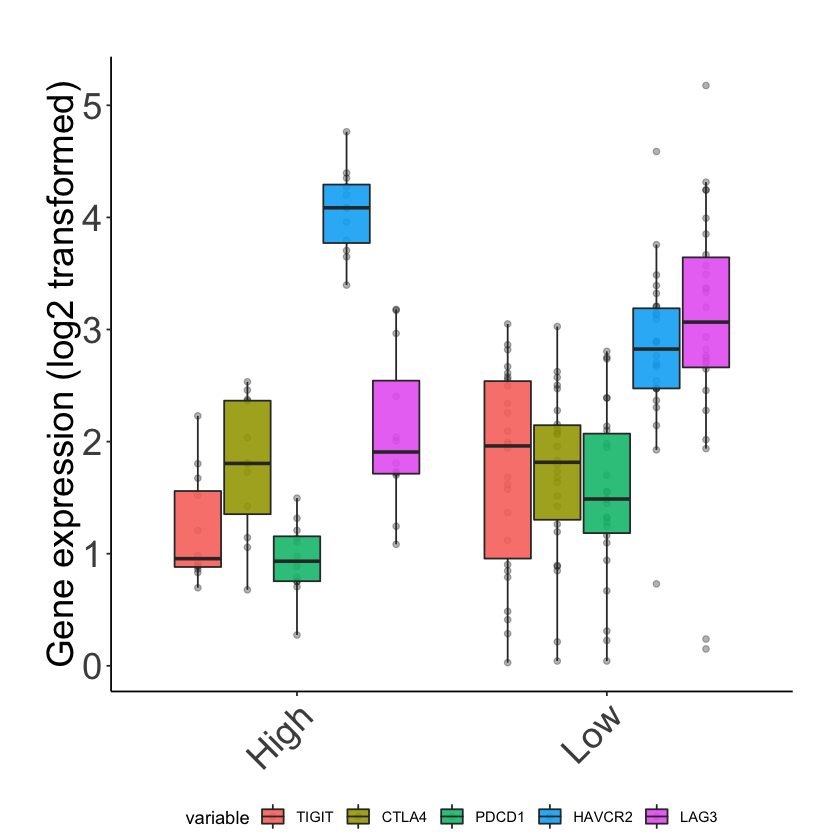

In [63]:
boxplot_TIMs

In [64]:
low_TIM_manifest$TIM <- "Low"
high_TIM_manifest$TIM <- "High"

In [65]:
TIMmanifest <- rbind(low_TIM_manifest,
                    high_TIM_manifest)

In [66]:
lowTIMsnbl_range$TIM <- "Low"
highTIMs$TIM <- "High"

In [67]:
TIMs <- rbind(lowTIMsnbl_range, highTIMs)

## Heatmap of checkpoint genes and celltypes for high vs low NBL TIMs

In [68]:
dim(low_TIM_exp)
dim(high_TIM_exp)

[1] 26 10

[1] 12 10

In [69]:
mean_gene_mat <- matrix(ncol = 2, nrow = 7)
colnames(mean_gene_mat) <- c("Low TIM3", "High TIM3")
rownames(mean_gene_mat) <- c("TIGIT", "CTLA4", "PD1",
                                "TIM3", "LAG3", 
                               "GZMA", "PRF1")

In [70]:
mean_gene_mat["TIGIT","Low TIM3"] <- mean(low_TIM_exp$TIGIT)
mean_gene_mat["CTLA4","Low TIM3"] <- mean(low_TIM_exp$CTLA4)
mean_gene_mat["PD1","Low TIM3"] <- mean(low_TIM_exp$PDCD1)
mean_gene_mat["TIM3","Low TIM3"] <- mean(low_TIM_exp$HAVCR2)
mean_gene_mat["LAG3","Low TIM3"] <- mean(low_TIM_exp$LAG3)
mean_gene_mat["GZMA","Low TIM3"] <- mean(low_TIM_exp$GZMA)
mean_gene_mat["PRF1","Low TIM3"] <- mean(low_TIM_exp$PRF1)

mean_gene_mat["TIGIT","High TIM3"] <- mean(high_TIM_exp$TIGIT)
mean_gene_mat["CTLA4","High TIM3"] <- mean(high_TIM_exp$CTLA4)
mean_gene_mat["PD1","High TIM3"] <- mean(high_TIM_exp$PDCD1)
mean_gene_mat["TIM3","High TIM3"] <- mean(high_TIM_exp$HAVCR2)
mean_gene_mat["LAG3","High TIM3"] <- mean(high_TIM_exp$LAG3)
mean_gene_mat["GZMA","High TIM3"] <- mean(high_TIM_exp$GZMA)
mean_gene_mat["PRF1","High TIM3"] <- mean(high_TIM_exp$PRF1)


In [71]:
heatmap_genes = Heatmap(mean_gene_mat,
                         #titles and names
                         name = "Gene expression (log2)",
                         show_row_names = TRUE,
                         show_column_names = TRUE,    
                         #clusters and orders
                         cluster_columns = FALSE,
                         cluster_rows = FALSE,
                         show_column_dend = FALSE,
                         #split
                         row_split = factor(c(rep("Checkpoints", 5), rep("CYT", 2)), 
                                    levels = c("Checkpoints", "Cytolytic activity")),                        
                         cluster_row_slices = FALSE,                        
                         cluster_column_slices = FALSE,
                         #aesthestics
                         column_names_gp = gpar(fontsize = 15),
                         row_names_gp = gpar(fontsize = 15),
                         column_title_gp = gpar(fontsize = 42),
                         column_title = NULL,
                         row_title = NULL,
                         row_gap = unit(0.2, "cm"),
                         width = unit(2, "cm"),
                         height = unit(7, "cm"),
                         rect_gp = gpar(col = "black")

                        
                       )

In [72]:
mean_immune_mat <- matrix(ncol = 2, nrow = 10)
colnames(mean_immune_mat) <- c("Low TIM3", "High TIM3")
rownames(mean_immune_mat) <- c("Immune Score", "CD8 T cells", "CD4 T cells",
                                 "Regulatory T cells", "B cells", "NK cells",
                                 "M1 Macrophages", "M2 Macrophages", "Neutrophils",
                                 "Dendritic cells")

In [73]:
dim(lowTIMsnbl_range)
dim(highTIMs)

[1] 26 30

[1] 12 30

In [75]:
mean_immune_mat["Immune Score","Low TIM3"] <- mean(lowTIMsnbl_range$ImmuneScore)
mean_immune_mat["CD8 T cells","Low TIM3"] <- mean(lowTIMsnbl_range$T.cells.CD8)
mean_immune_mat["CD4 T cells","Low TIM3"] <- mean(lowTIMsnbl_range$T.cells.CD4)
mean_immune_mat["Regulatory T cells","Low TIM3"] <- mean(lowTIMsnbl_range$Tregs)
mean_immune_mat["B cells","Low TIM3"] <- mean(lowTIMsnbl_range$B.cells)
mean_immune_mat["NK cells","Low TIM3"] <- mean(lowTIMsnbl_range$NK.cells)
mean_immune_mat["M1 Macrophages","Low TIM3"] <- mean(lowTIMsnbl_range$Macrophages.M1)
mean_immune_mat["M2 Macrophages","Low TIM3"] <- mean(lowTIMsnbl_range$Macrophages.M2)
mean_immune_mat["Neutrophils","Low TIM3"] <- mean(lowTIMsnbl_range$Neutrophils)
mean_immune_mat["Dendritic cells","Low TIM3"] <- mean(lowTIMsnbl_range$Dendritic.cells)


In [76]:
mean_immune_mat["Immune Score","High TIM3"] <- mean(highTIMs$ImmuneScore)
mean_immune_mat["CD8 T cells","High TIM3"] <- mean(highTIMs$T.cells.CD8)
mean_immune_mat["CD4 T cells","High TIM3"] <- mean(highTIMs$T.cells.CD4)
mean_immune_mat["Regulatory T cells","High TIM3"] <- mean(highTIMs$Tregs)
mean_immune_mat["B cells","High TIM3"] <- mean(highTIMs$B.cells)
mean_immune_mat["NK cells","High TIM3"] <- mean(highTIMs$NK.cells)
mean_immune_mat["M1 Macrophages","High TIM3"] <- mean(highTIMs$Macrophages.M1)
mean_immune_mat["M2 Macrophages","High TIM3"] <- mean(highTIMs$Macrophages.M2)
mean_immune_mat["Neutrophils","High TIM3"] <- mean(highTIMs$Neutrophils)
mean_immune_mat["Dendritic cells","High TIM3"] <- mean(highTIMs$Dendritic.cells)

In [82]:
options(scipen = 999)

In [83]:
mean_immune_mat

,Low TIM3,High TIM3
Immune Score,1374.778769231,1343.068028333
CD8 T cells,0.030437302,0.008503142
CD4 T cells,0.054634422,0.029456236
Regulatory T cells,0.020454844,0.025124819
B cells,0.050070759,0.015565611
NK cells,0.027730676,0.039486417
M1 Macrophages,0.015007277,0.022247321
M2 Macrophages,0.032404867,0.055357822
Neutrophils,0.001535931,0.000000000
Dendritic cells,0.011119146,0.013706684


In [78]:
col_fun_IS = colorRamp2(c(1000, 800, 600, 400,
                           200, 0, -200, -400, 
                           -600, -800, -1000), 
                     c("#a50026","#d73027", "#f46d43", "#fdae61",
                      "#fee090", "#ffffbf", "#e0f3f8" ,"#abd9e9",
                      "#74add1","#4575b4","#313695"))

heatmap_IS = Heatmap(mean_immune_mat[1,,drop = F], 
                        name = "Immune score",
                        col = col_fun_IS,  
                        #format rows
                        row_names_gp = gpar(fontsize = 15),                      
                        cluster_rows = FALSE,
                        cluster_row_slices = FALSE, 
                        show_row_dend = FALSE,                      
                        #format cols
                        show_column_dend = FALSE, 
                        cluster_columns = FALSE,
                        column_names_gp = gpar(fontsize = 15), 
                        rect_gp = gpar(col = "black"), 
                        #legend
                        show_heatmap_legend = TRUE,
                        width = unit(2, "cm"),
                        height = unit(1, "cm"),
                        heatmap_legend_param = list(labels_gp = gpar(fontsize = 12),
                                                    color_bar = "continuous",
                                                    at = c(1000, 800, 600, 400,
                                                           200, 0, -200, -400, 
                                                           -600, -800, -1000)))


In [79]:
col_fun = colorRamp2(c(0, 0.02, 0.05), 
                     c("white", 
                       "#ef6548","#7f0000"))
    
heatmap_cells = Heatmap(mean_immune_mat[-1, ,drop = F], 
                      name = "Cell fraction",
                      col = col_fun,                          
                      #format rows
                      row_names_gp = gpar(fontsize = 15),                      
                      cluster_rows = FALSE,
                      cluster_row_slices = FALSE, 
                      show_row_dend = FALSE,                      
                      #format cols
                      show_column_dend = FALSE, 
                      cluster_columns = FALSE,
                      column_names_gp = gpar(fontsize = 15), 
                      rect_gp = gpar(col = "black"), 
                      #legend
                      show_heatmap_legend = TRUE,
                      width = unit(2, "cm"),
                      height = unit(9, "cm"),
                      heatmap_legend_param = list(labels_gp = gpar(fontsize = 12)))


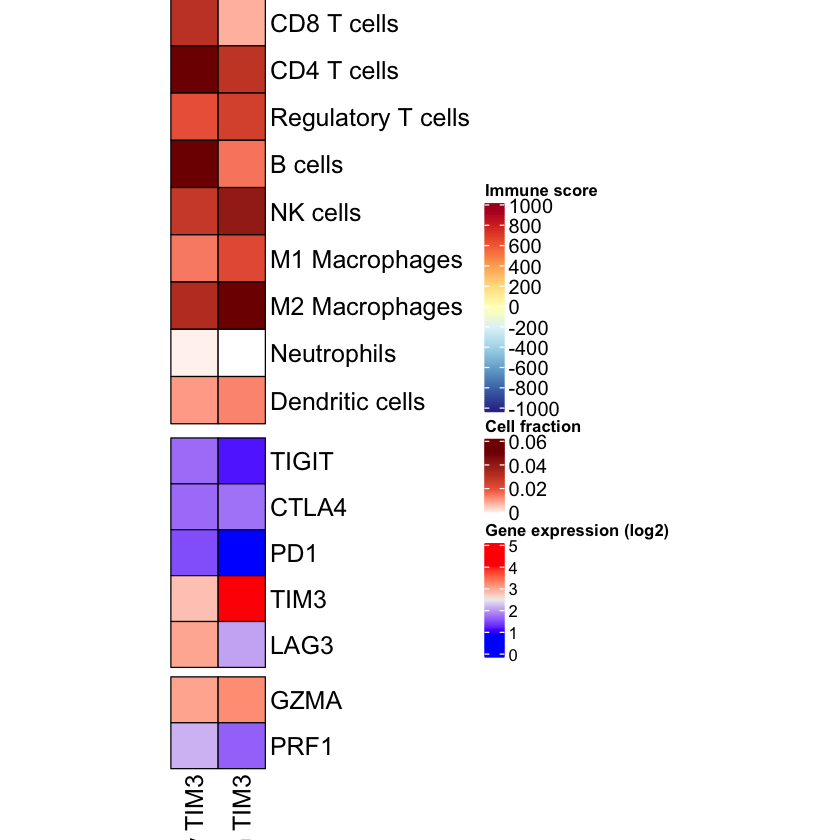

In [80]:
heatmap_IS %v%
heatmap_cells %v%
heatmap_genes

In [81]:
pdf(file = "heatmap_IS_cells_genes_TIM3_NBL.pdf",
    width = 15, 
    height = 15,
    useDingbats = FALSE)
draw(heatmap_IS %v%
     heatmap_cells %v%
     heatmap_genes,
     ht_gap = unit(0.2,"cm"))
dev.off()

pdf 
  2

In [82]:
colnames(TIMs)

[1] "sample_id"        "aliquot_id"       "StromalScore"     "ImmuneScore"     
 [5] "ESTIMATEScore"    "name"             "case_id"          "gender"          
 [9] "ethnicity"        "race"             "age_at_diagnosis" "vital_status"    
[13] "days_to_death"    "disease_type"     "primary_site"     "group"           
[17] "cohort"           "sample_type"      "B.cells"          "Macrophages.M1"  
[21] "Macrophages.M2"   "Monocytes"        "Neutrophils"      "NK.cells"        
[25] "T.cells.CD4"      "T.cells.CD8"      "Tregs"            "Dendritic.cells" 
[29] "Other"            "TIM"

### Stats test for TIM samples

In [83]:
stat.fx <- function(mydf, group){
    mat_p <- matrix(nrow = 10, 
                    ncol = 1)
    rownames(mat_p) <- c("ImmuneScore","B.cells", 
                         "Macrophages.M1", "Macrophages.M2",
                         "Neutrophils", "NK.cells", "T.cells.CD4", "T.cells.CD8",
                          "Tregs", "Dendritic.cells")
    colnames(mat_p) <-  "TIM3"
    
    for(i in 1:nrow(mat_p)){
        var <- rownames(mat_p)[i]
        wiltest <- tryCatch(wilcox.test(mydf[[var]] ~ mydf[[group]]),            
                            error = function(e) NULL)   
        if(!is.null(wiltest)){
            mat_p[i,1] <- wiltest$p.value 
                            }
                            }
    return(mat_p)
}

In [86]:
options(scipen = 999)

In [94]:
TIMs_p <- stat.fx(TIMs,"TIM")

Warning message in wilcox.test.default(x = c(0, 0.0147488861867437, 0.0024995815316161, :
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(x = c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), :
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(x = c(0.0251276957898479, 0.00409162709142605, :
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(x = c(0, 0.0297915215953934, 0, 0, 0, 0, :
“cannot compute exact p-value with ties”

In [103]:
as.data.frame(TIMs_p)

,TIM3
ImmuneScore,0.6310592211
B.cells,0.0110641614
Macrophages.M1,0.0950694655
Macrophages.M2,0.0002841009
Neutrophils,0.1659905849
NK.cells,0.0705865234
T.cells.CD4,0.0616752476
T.cells.CD8,0.0010117478
Tregs,0.1743610051
Dendritic.cells,0.3559590203


In [114]:
library(reshape2)
padjust.fx <- function(mymat){
    mymat <- as.data.frame(mymat)
    mymat$padj <- p.adjust(mymat[,1], 
                           method = "bonferroni")
    return(mymat[order(mymat$padj),])
    
}

In [115]:
padjust.fx(TIMs_p)

,TIM3,padj
Macrophages.M2,0.0002841009,0.002841009
T.cells.CD8,0.0010117478,0.010117478
B.cells,0.0110641614,0.110641614
T.cells.CD4,0.0616752476,0.616752476
NK.cells,0.0705865234,0.705865234
Macrophages.M1,0.0950694655,0.950694655
ImmuneScore,0.6310592211,1.000000000
Neutrophils,0.1659905849,1.000000000
Tregs,0.1743610051,1.000000000
Dendritic.cells,0.3559590203,1.000000000


# 2- pediatric CNS tumors

In [116]:
highCYTids <- c("7316-85",
                "7316-2581",
                "H049-PF1J",
                "H049-GWNW",
                "7316-161",
                "7316-2641",
                "7316-1455",
                "ICGC_GBM58",
                "7316-445",
                "H049-0CWK",
                "H049-UV6K",
                "7316-171",
                "7316-2582",
                "H049-7SD3",
                "H049-SPP6")

In [117]:
head(subst_exp)

,7316-100,7316-101,7316-1038,7316-1052,7316-1059,7316-1060,7316-1064,7316-10,7316-1072,7316-1073,⋯,ICGC_PA89,ICGC_PA9,ICGC_PA91,ICGC_PA92,ICGC_PA93,ICGC_PA94,ICGC_PA95,ICGC_PA96,ICGC_PA97,ICGC_PA99
CD274,1.7441611,0.31034012,0.2986583,0.59454855,0.2750070,0.3561438,0.38956681,0.3219281,0.02856915,0.3103401,⋯,0.77146176,0.66756934,0.83203041,1.18228469,0.61039575,0.73060135,0.66720037,0.89282646,0.54870196,0.59861627
CTLA4,0.3103401,0.15055968,0.0976108,0.04264434,0.2141248,0.3103401,0.02856915,0.2265085,0.00000000,0.1634987,⋯,0.02526695,0.15610696,0.06814687,0.07418980,0.06737888,0.04229301,0.08679828,0.00000000,0.10032855,0.04655752
GZMA,0.7907720,0.09761080,0.2016339,0.18903382,0.2868811,0.3219281,0.12432814,0.3334237,0.04264434,0.6780719,⋯,0.10172947,0.56109378,0.22285912,0.21001989,0.77552019,0.13434546,0.69395233,0.05907094,0.36039459,0.40678807
HAVCR2,2.2957230,2.33913738,1.1309309,2.60644223,2.4436067,3.9634741,2.09761080,0.7990873,0.40053793,4.3483741,⋯,2.34324418,3.08721447,3.15061025,2.73288072,3.63531149,2.86155414,2.93937444,2.74577774,3.09382367,3.15106960
LAG3,0.3334237,0.04264434,0.8953026,0.48542683,0.7224660,0.6959938,1.20789285,0.5945485,0.05658353,0.5558162,⋯,0.05794244,0.03246825,0.03578987,0.10941961,0.06201836,0.04856017,0.05586858,0.04599027,0.09431511,0.01179561
PDCD1,0.6135317,0.09761080,0.1375035,0.02856915,0.6040713,0.1375035,0.89530262,0.1375035,0.00000000,0.2750070,⋯,0.02674827,0.03411609,0.03181525,0.07826144,0.07958779,0.00000000,0.10917186,0.03344111,0.02166961,0.00000000


In [118]:
highCYT <- primary_estimate_manifest_quanti_cutoff[primary_estimate_manifest_quanti_cutoff$sample_id %in% highCYTids,]
highCYT_expmat <- subst_exp[,colnames(subst_exp) %in% highCYTids]

In [119]:
othersexpmat <- subst_exp[,!colnames(subst_exp) %in% highCYTids]

In [120]:
highCYT_expmat_t <- as.data.frame(t(highCYT_expmat))
othersexpmat_t<- as.data.frame(t(othersexpmat))

In [121]:
highCYT_expmat_t$CYT <- (highCYT_expmat_t$GZMA + highCYT_expmat_t$PRF1) / 2

othersexpmat_t$CYT <- (othersexpmat_t$GZMA + othersexpmat_t$PRF1) / 2

In [122]:
highCYT_expmat_t$sample_id <- rownames(highCYT_expmat_t)
othersexpmat_t$sample_id <- rownames(othersexpmat_t)

In [123]:
load(
    file = "/Users/anabbi/OneDrive - UHN/Documents/ImmPedCan/Finaldata/primary_estimate_manifest_quanti.RData")

In [124]:
primary_estimate_manifest_quanti_cutoff

,sample_id,aliquot_id,StromalScore,ImmuneScore,ESTIMATEScore,name,case_id,gender,ethnicity,race,⋯,Macrophages.M1,Macrophages.M2,Monocytes,Neutrophils,NK.cells,T.cells.CD4,T.cells.CD8,Tregs,Dendritic.cells,Other
1,7316-10,7316.10_717108,959.44320,1027.821900,1987.265100,7316.10_717108.genes.results,C15129,Female,Not Hispanic or Latino,Black or African American,⋯,0.00000000000,0.000000000,0.0387405753,0.0000000000,0.0097754054,0.000000000,0.000000000,0.0030242965,0.0000000000,0.9463668
2,7316-100,7316.100_601598,18.30600,402.585900,420.891900,7316.100_601598.genes.results,C17958,Female,Hispanic or Latino,Black or African American,⋯,0.01842817513,0.013807159,0.0000000000,0.0319164817,0.0077687526,0.000000000,0.000000000,0.0051207252,0.0131052278,0.8997400
3,7316-101,7316.101_588338,-822.77950,-295.917500,-1118.697000,7316.101_588338.genes.results,C23862,Male,Not Hispanic or Latino,Black or African American,⋯,0.00000000000,0.000000000,0.0831061727,0.0000000000,0.0311699863,0.000000000,0.000000000,0.0000000000,0.0000000000,0.8725539
5,7316-1052,7316.1052,-942.94240,-510.406900,-1453.349300,7316.1052.genes.results,C177120,Female,Not Hispanic or Latino,White,⋯,0.00000000000,0.002023271,0.0233145485,0.0000000000,0.0312411748,0.044054820,0.000000000,0.0100385589,0.0546973724,0.8183241
6,7316-1059,7316.1059,-277.60060,-180.867400,-458.467900,7316.1059.genes.results,C176751,Female,Reported Unknown,White,⋯,0.00000000000,0.009043452,0.0256314458,0.0000000000,0.0250525028,0.000000000,0.000000000,0.0126922665,0.0365036333,0.8834455
7,7316-1060,7316.1060,-144.75970,956.075000,811.315300,7316.1060.genes.results,C176628,Female,Not Hispanic or Latino,White,⋯,0.02306975487,0.030773720,0.0427558671,0.0000000000,0.0232978420,0.000000000,0.000000000,0.0000000000,0.0294228442,0.8295729
9,7316-1072,7316.1072_728284,747.42470,1702.593900,2450.018600,7316.1072_728284.genes.results,C333699,Male,Reported Unknown,Other,⋯,0.00029813630,0.001736511,0.0001109093,0.0009466243,0.0007069285,0.002308878,0.000000000,0.0004597404,0.0005436436,0.9912353
10,7316-1073,7316.1073,73.04488,1117.778230,1190.823110,7316.1073.genes.results,C333453,Male,Reported Unknown,Other,⋯,0.05935601462,0.010760759,0.0000000000,0.0000000000,0.0150194916,0.000000000,0.000000000,0.0041405087,0.0350473603,0.8583510
11,7316-1075,7316.1075_588351,-168.72740,660.247400,491.520000,7316.1075_588351.genes.results,C291264,Male,Reported Unknown,Other,⋯,0.00925921381,0.018036383,0.0000000000,0.0171787357,0.0090462962,0.000000000,0.000000000,0.0069867665,0.0208094095,0.9062363
13,7316-1077,7316.1077_731885,-663.39260,-476.460500,-1139.853000,7316.1077_731885.genes.results,C291510,Male,Reported Unknown,Other,⋯,0.00000000000,0.000000000,0.0372304562,0.0000000000,0.0336415770,0.000000000,0.000000000,0.0000000000,0.0392255122,0.8764805


In [130]:
highCYT <- merge(highCYT_expmat_t,
                    primary_estimate_manifest_quanti_cutoff,
                    by = "sample_id")

othersexpmat <- merge(othersexpmat_t,
                          primary_estimate_manifest_quanti_cutoff,
                          by = "sample_id")

In [138]:
highCYT$disease_type

[1] "High-grade glioma/astrocytoma (WHO grade III/IV)"
 [2] "High-grade glioma/astrocytoma (WHO grade III/IV)"
 [3] "Neuroinflammatory Systemic Disease"              
 [4] "Low-grade glioma/astrocytoma (WHO grade I/II)"   
 [5] "Atypical Teratoid Rhabdoid Tumor (ATRT)"         
 [6] "Non-Langerhans Histiocytosis (JXG-CNS)"          
 [7] "High-grade glioma/astrocytoma (WHO grade III/IV)"
 [8] "High-grade glioma/astrocytoma (WHO grade III/IV)"
 [9] "ATRT_MYC"                                        
[10] "ATRT_TYR"                                        
[11] "ATRT_SHH"                                        
[12] "ATRT_TYR"                                        
[13] "ATRT_TYR"                                        
[14] "ATRT_MYC"                                        
[15] "HGGother_WT"

In [131]:
highCYT$disease_type

[1] "High-grade glioma/astrocytoma (WHO grade III/IV)"
 [2] "High-grade glioma/astrocytoma (WHO grade III/IV)"
 [3] "Neuroinflammatory Systemic Disease"              
 [4] "Low-grade glioma/astrocytoma (WHO grade I/II)"   
 [5] "Atypical Teratoid Rhabdoid Tumor (ATRT)"         
 [6] "Non-Langerhans Histiocytosis (JXG-CNS)"          
 [7] "High-grade glioma/astrocytoma (WHO grade III/IV)"
 [8] "High-grade glioma/astrocytoma (WHO grade III/IV)"
 [9] "ATRT_MYC"                                        
[10] "ATRT_TYR"                                        
[11] "ATRT_SHH"                                        
[12] "ATRT_TYR"                                        
[13] "ATRT_TYR"                                        
[14] "ATRT_MYC"                                        
[15] "HGGother_WT"

In [135]:
table(primary_estimate_manifest_quanti_cutoff$cohort)


  ATRT   COAD    CPH   DNET     EP     ET    GBM    GGM    LGG   LUAD     MB 
    26    298     31     16     64      1    152     35    442    522     21 
    MN    NBL    NFB  Other     OV     PA pedHGG pedLGG   PNET   PRAD   SCHN 
    19    127     14     98    342     46     75    220     10    473     15 
  SKCM  TT/GN     WT 
   101      8     36 

In [129]:
othersexpmat_trb_cns <- othersexpmat_trb[ othersexpmat_trb$group != "TCGA"&
                                        othersexpmat_trb$group != "TARGET",]

ERROR: Error in eval(expr, envir, enclos): object 'othersexpmat_trb' not found


In [771]:
summary(highCYT_TRB$mutpermb[highCYT_TRB$cohort == "ATRT"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0333  0.1166  0.1332  0.2379  0.2997  0.6660 

In [772]:
summary(othersexpmat_trb_cns$mutpermb[othersexpmat_trb_cns$cohort == "ATRT"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03330 0.09991 0.16651 0.31205 0.26641 1.63179 

In [136]:
7 / 26

[1] 0.2692308

### High PD1

In [666]:
highPDids <- c("7316-876",
               "7316-229",
               "7316-179",
               "7316-2180",
               "7316-2150",
               "7316-2686")

In [667]:
highPD1 <- primary_estimate_manifest_quanti_cutoff[primary_estimate_manifest_quanti_cutoff$sample_id %in% highPDids,]


In [669]:
highPD1[,5:15]

,ESTIMATEScore,name,case_id,gender,ethnicity,race,age_at_diagnosis,vital_status,days_to_death,disease_type,primary_site
159,-441.9373,7316.179_170326.genes.results,C40098,Female,Hispanic or Latino,Other,0,Alive,NA,Medulloblastoma,Cerebellum/Posterior Fossa
263,-1308.5496,7316.2150.genes.results,C581175,Female,Not Hispanic or Latino,Other,9,Deceased-due to other,830,Ewings Sarcoma,Cerebellum/Posterior Fossa
281,-1092.8246,7316.2180_588374.genes.results,C624102,Female,Not Hispanic or Latino,White,12,Alive,NA,Chondrosarcoma,Spinal Cord- Thoracic
324,-480.6600,7316.229_746088.genes.results,C52152,Female,Not Hispanic or Latino,White,5,Alive,NA,Craniopharyngioma,Suprasellar/Hypothalamic/Pituitary
415,-2084.2441,7316.2686_717179.genes.results,C720657,Female,Reported Unknown,Other,3,Alive,NA,Supratentorial or Spinal Cord PNET,Temporal Lobe
758,-594.2778,7316.876_731907.genes.results,C139113,Female,Not Hispanic or Latino,White,6,Alive,NA,Ewings Sarcoma,Skull
